# Iris

We are given a dataset in which are registered flowers and their caracteristics.
We have to classify the said flowers in different groups thanks to machine learning.

# Summary

* Sepal length, width and species correlation
* Petal length, width and species correlation
* Global correlation box


* Logistic Regression Model

# Library used

In [288]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

# Machine Learning Library
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from warnings import filterwarnings
filterwarnings('ignore')

## Importing the data

In [289]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Missing values

In [290]:
(data.isnull().sum()/data.shape[0])*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

The dataset is filled, we can use it safely with no need of cleaning.

In [291]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

There are 50 flowers of each species in the dataset.

# Sepal length, width and species correlation

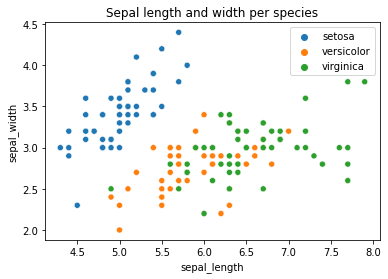

In [292]:
sepal_species_fig = sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title("Sepal length and width per species")
plt.show()

By studying the sepal length and width, we can see Iris-setosa clearly distinguish itself from the rest, however the two species left are quite mixed and hard to differentiate.

# Petal length, width and species correlation

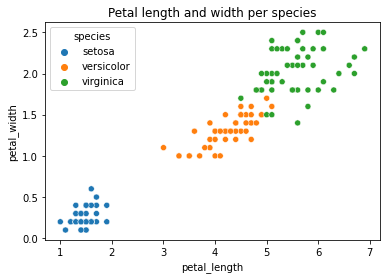

In [293]:
petal_species_fig = sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')
plt.title("Petal length and width per species")
plt.show()

We clearly distinguish clusters depending on the petal length and width : they represent the 3 different species

# Correlation box

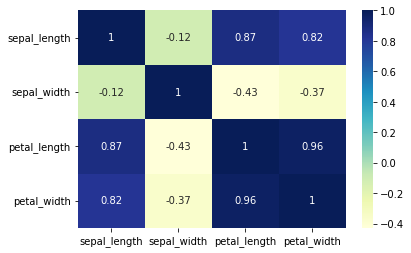

In [294]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

With this correlation box, we can see a big correlation between petals and sepals length, not so much between sepal width and the rest.

# Preparing training data

In [295]:
# Flowers characteristics columns
X= data.iloc[:,:-1]
# Species column
y= data.iloc[:,-1]
# y = data['species']
print('Flowers characteristics columns:\n\n', X.head(), '\n')
print('Species column:\n\n', y.head())

Flowers characteristics columns:

    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

Species column:

 0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


The species column is the target. 

With machine learning, we want to guess a given flower's species with its characteristics.

# Slicing the dataset

In [296]:
'''
70 percent of the dataset is used for the training
30 percent is used for test
'''
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model

In [297]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## Testing model

In [298]:
predictions = model.predict(x_test)
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa'] 

Real values:

 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virgi

## Model evaluation

In [299]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



The classification report shows how well the logistic regression model did guessing the flowers' species.

#### Accuracy score

In [300]:
print("Accuracy score:", accuracy_score(y_test, predictions)*100, "%")

Accuracy score: 100.0 %


The logistic regression model has an accuracy score of 100%, which means it found the right species for every test flower.

# Decision Tree

### Model training

In [301]:
Iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
Iris_clf.fit(x_train, y_train)

DecisionTreeClassifier()

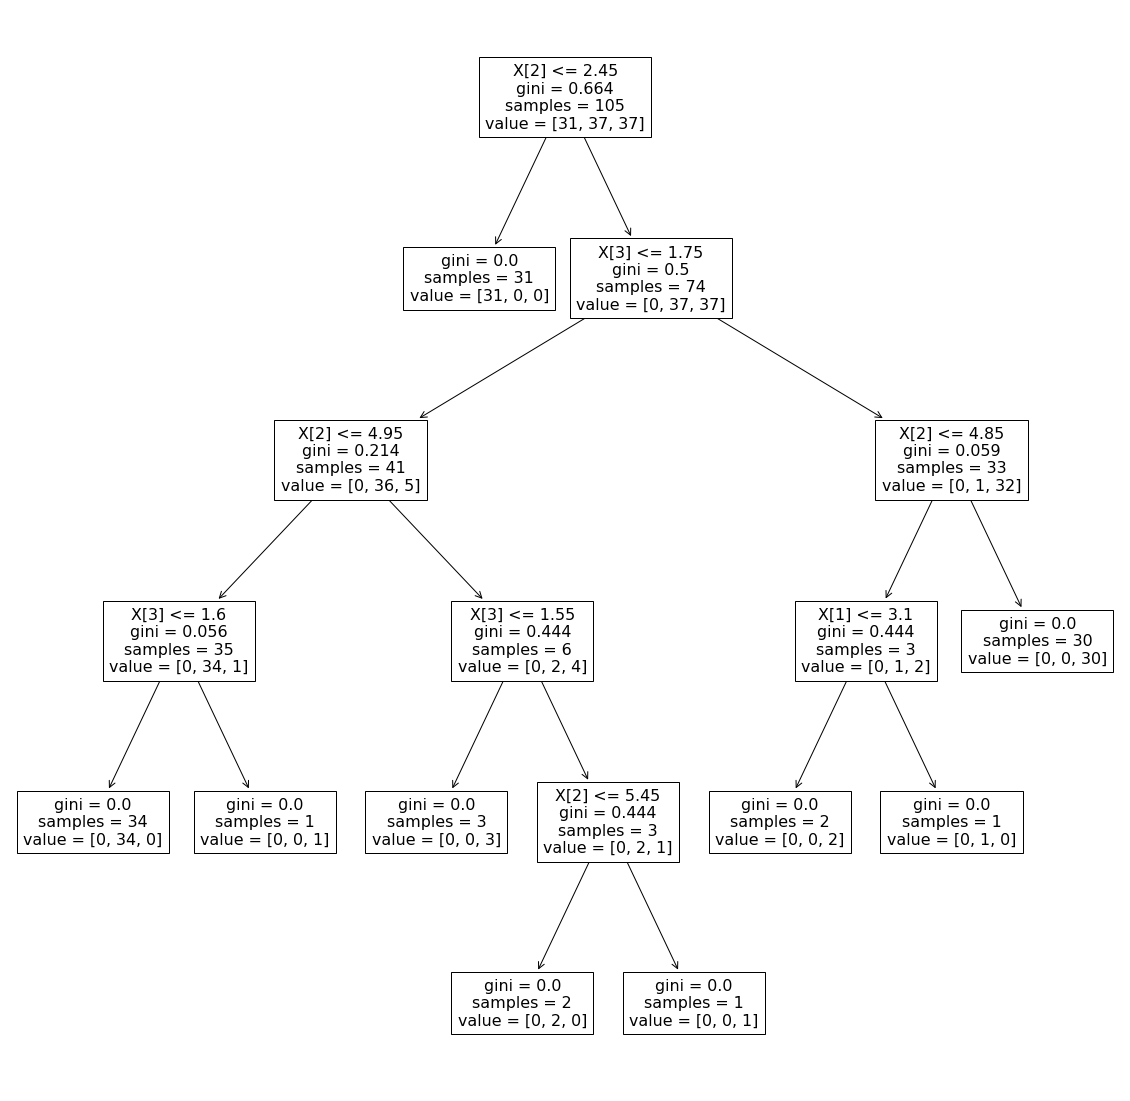

In [309]:
plt.figure(figsize=(20,20))
tree.plot_tree(Iris_clf)
plt.show()

## Model evaluation

#### Accuracy score using cross validation

In [303]:
print("Accuracy score:", 
      round((cross_val_score(Iris_clf, x_train, y_train, cv=3, scoring='accuracy').mean())*100, 2), '%')

Accuracy score: 91.43 %


 #### Accuracy score on unseen data

In [305]:
predictions = Iris_clf.predict(x_test)
print("Accuracy score on unseen data:", round((accuracy_score(y_test, predictions)*100), 2), '%')
print("Multilabel confusion matrix:\n", multilabel_confusion_matrix(y_test, predictions))

Accuracy score on unseen data: 100.0 %
Multilabel confusion matrix:
 [[[26  0]
  [ 0 19]]

 [[32  0]
  [ 0 13]]

 [[32  0]
  [ 0 13]]]


In [306]:
print("Predictions:\n\n", predictions, '\n')
print("Real values:\n\n", y_test)

Predictions:

 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa'] 

Real values:

 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virgi

In [ ]:
The decision tree has an accuracy score of 100%, which means it found the right species for every test flower.